### 1. Load the Document

In [75]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf")
documents = loader.load()

# Validate
print(f"Number of pages loaded: {len(documents)}")
print(f"First page content preview:\n {documents[0].page_content[:500]}")
print(f"Metadata: {documents[0].metadata}")

Number of pages loaded: 768
First page content preview:
 
Metadata: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and the Deathly Hallows', 'subject': '', 'keywords': '', 'ptex.fullbanner': 'This is pdfeTeX, Version 3.141592-1.21a-2.2 (Web2C 7.5.4) kpathsea version 3.5.4', 'source': 'https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf', 'total_pages': 768, 'page': 0, 'page_label': 'i'}


### 2. Inspect the Raw Text

In [76]:
page = documents[8]
print(f"Page content length: {len(page.page_content)} characters")
print(f"Content : \n{page.page_content[:500]}")

Page content length: 846 characters
Content : 
Chapter 1
The Dark Lord
Ascending
T
he two men appeared out of nowhere, a few yards apart
in the narrow, moonlit lane. For a second they stood
quite still, wands directed at each other’s chests; then,
recognizing each other, they stowed their wands be-
neath their cloaks and started walking briskly in the same direc-
tion.
“News?” asked the taller of the two.
“The best,” replied Severus Snape.
The lane was bordered on the left by wild, low-growing bram-
bles, on the right by a high, nearty manic


### 3. Chunk the Document

In [96]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=250,
    separators=["\n\n", "\n", ".", " ", ""]
)

chunks = splitter.split_documents(documents)

# Validate
print(f"Number of Chunks\t\t: {len(chunks)}")
print(f"\nFirst Chunk\t\t: {chunks[0].page_content[:500] }")
print(f"\nChunk Metadata\t\t: {chunks[0].metadata}")
print(f"\nChunk Sizes\t\t : {[len(chunk.page_content) for chunk in chunks[:10]]}")

Number of Chunks		: 1526

First Chunk		: Harry Potter and the
Deathly Hallows
by J. K. Rowling
brought to you by Dark Miasma
Special Thanks to the DSB release

Chunk Metadata		: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and the Deathly Hallows', 'subject': '', 'keywords': '', 'ptex.fullbanner': 'This is pdfeTeX, Version 3.141592-1.21a-2.2 (Web2C 7.5.4) kpathsea version 3.5.4', 'source': 'https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf', 'total_pages': 768, 'page': 2, 'page_label': 'i'}

Chunk Sizes		 : [117, 168, 255, 469, 295, 934, 846, 941, 974, 301]


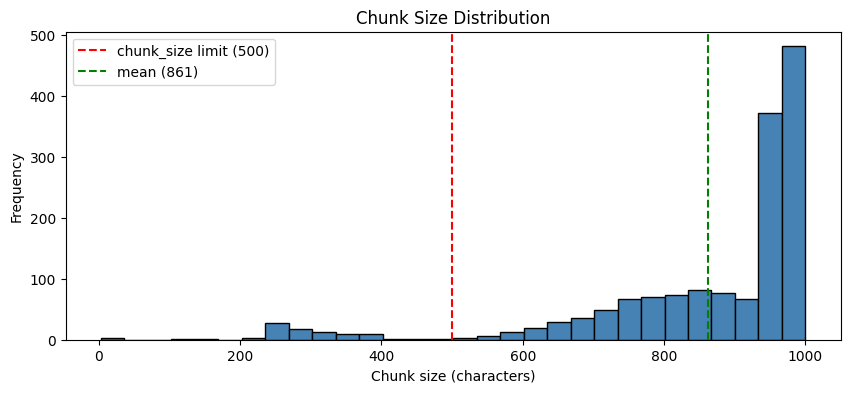

In [97]:
import matplotlib.pyplot as plt

chunk_sizes = [len(chunk.page_content) for chunk in chunks]

plt.figure(figsize=(10, 4))
plt.hist(chunk_sizes, bins=30, color="steelblue", edgecolor="black")
plt.axvline(500, color="red", linestyle="--", label="chunk_size limit (500)")
plt.axvline(sum(chunk_sizes)/len(chunk_sizes), color="green", linestyle="--", label=f"mean ({sum(chunk_sizes)//len(chunk_sizes)})")
plt.xlabel("Chunk size (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Size Distribution")
plt.legend()
plt.show()

**Why chunks vary in size:**

**1. Natural boundaries are respected** — the splitter tries to break on \n\n, \n, ., " " before hitting the 500 limit, so a paragraph ending at 320 characters won't be padded to 500.

**2. Short pages/sections** — a page with only a heading or 2 lines will produce a small chunk.

**3. Overlap adds extra characters** — some chunks will be slightly larger due to the chunk_overlap.

**4. PDF extraction artifacts/** — PDFs often have inconsistent whitespace, headers, footers, and page numbers that affect how text is split.



### 4. Experiment with Chunk Size

In [98]:
# Try a larger chunk size
splitter_larger = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100
)
chunks_larger = splitter_larger.split_documents(documents)

# Try a smaller chunk size
splitter_smaller = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20
)
chunks_smaller = splitter_smaller.split_documents(documents)

# ✅ Validate
print(f"Small chunks (200):  {len(chunks_smaller)}")
print(f"Large chunks (1000): {len(chunks_larger)}")

Small chunks (200):  6867
Large chunks (1000): 1483


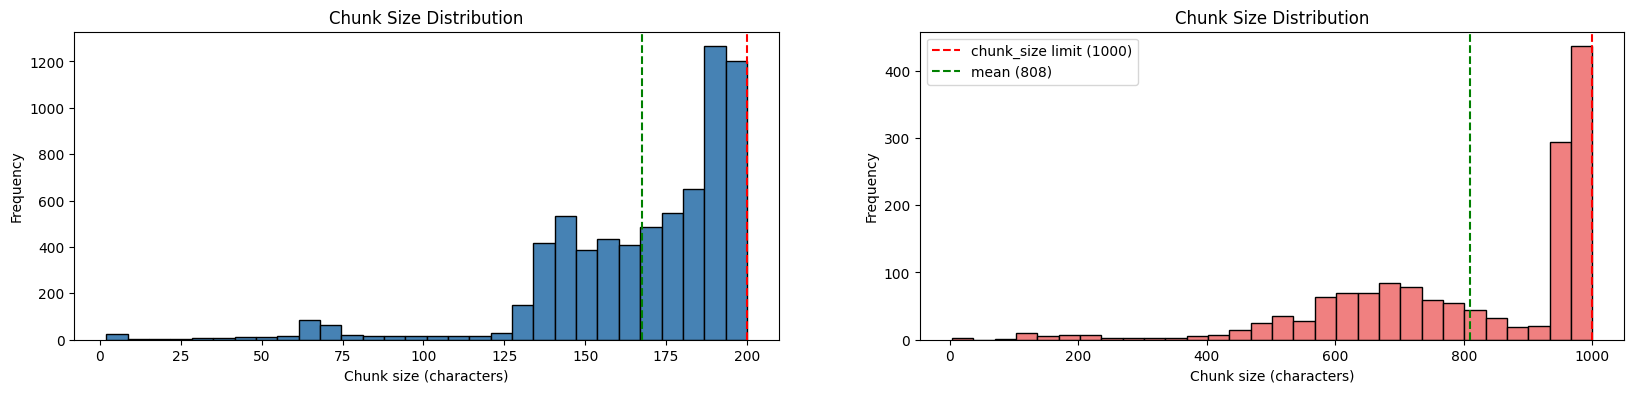

In [99]:


smaller_chunk_sizes = [len(chunk.page_content) for chunk in chunks_smaller]
larger_chunk_sizes = [len(chunk.page_content) for chunk in chunks_larger]

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.hist(smaller_chunk_sizes, bins=30, color="steelblue", edgecolor="black")
plt.axvline(200, color="red", linestyle="--", label="chunk_size limit (200)")
plt.axvline(sum(smaller_chunk_sizes)/len(smaller_chunk_sizes), color="green", linestyle="--", label=f"mean ({sum(smaller_chunk_sizes)//len(smaller_chunk_sizes)})")
plt.xlabel("Chunk size (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Size Distribution")

plt.subplot(1, 2, 2)
plt.hist(larger_chunk_sizes, bins=30, color="lightcoral", edgecolor="black")
plt.axvline(1000, color="red", linestyle="--", label="chunk_size limit (1000)")
plt.axvline(sum(larger_chunk_sizes)/len(larger_chunk_sizes), color="green", linestyle="--", label=f"mean ({sum(larger_chunk_sizes)//len(larger_chunk_sizes)})")
plt.xlabel("Chunk size (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Size Distribution")
plt.legend()
plt.show()

### 5. Create Embeddings

In [100]:
import os
from dotenv import load_dotenv
load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")

In [101]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small", api_key=openai_api_key)

# Test on a single chunk before ebedding all
test_vector = embeddings.embed_query(chunks[0].page_content)

# Validate
print(f" Vector dimension: {len(test_vector)}")
print(f" First 5 values: {test_vector[:5]}")

 Vector dimension: 1536
 First 5 values: [0.0077145835384726524, 0.04257283732295036, -0.019295966252684593, -0.005416689906269312, 0.002074443269520998]


### 6. Store in a Vector Store

In [102]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

# Validate
print(f"Vector store created successfully with {vectorstore.index.ntotal} vectors.")

Vector store created successfully with 1526 vectors.


### 7. Query the Vector Store

In [103]:
query = "When did Ron mutter Descendo?"
# query = "Descendo" 
results = vectorstore.similarity_search(query, k=3, fetch_k=20, lambda_mult=1)

# Fetch k
# lambda_mult

# ✅ Validate
print(f"Top {len(results)} results for: '{query}'\n")
for i, doc in enumerate(results):
    print(f"--- Result {i+1} ---")
    print(f"Source: {doc.metadata}")
    print(f"Content: {doc.page_content[:200]}")
    print()

Top 3 results for: 'When did Ron mutter Descendo?'

--- Result 1 ---
Source: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and the Deathly Hallows', 'subject': '', 'keywords': '', 'ptex.fullbanner': 'This is pdfeTeX, Version 3.141592-1.21a-2.2 (Web2C 7.5.4) kpathsea version 3.5.4', 'source': 'https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf', 'total_pages': 768, 'page': 226, 'page_label': '219'}
Content: however, was too quick for him.
“Expelliarmus!”
Mundungus’s wand soared into the air, and Hermione caught
it. Wild-eyed, Mundungus dived for the stairs: Ron rugby–tackled
him, and Mundungus hit the st

--- Result 2 ---
Source: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and t

In [104]:
from langchain_community.retrievers import BM25Retriever

bm25_retriever = BM25Retriever.from_documents(chunks, k=10)

vector_retriever = vectorstore.as_retriever(
    search_kwargs={"k" : 10}
)

# Chain - LangChain Expression

### 1. Create the prompt template

In [111]:
from langchain_core.prompts import ChatPromptTemplate

# prompt_template = ChatPromptTemplate.from_template("""
# You are a document assistant.

# Rules:
# 1. Answer using only the provided context.
# 2. If the answer can be reasonably inferred from the context, answer it.
# 3. If the context clearly contains no relevant information, reply exactly:
#    "This information is not in the document."
# 4. Do not use outside knowledge.

# Context:
# {context}

# Question:
# {question}
# """)

prompt_template = ChatPromptTemplate.from_template("""
Answer the question using only the provided context.
If the answer can be inferred from the context, answer it.
Do not use outside knowledge.

Context:
{context}

Question:
{question}
""")

# ✅ Validate — inspect the template
print(prompt_template.input_variables)  # should show ['context', 'question']

['context', 'question']


### 3. Create the retriever

In [112]:


def hybrid_retrieve(query, k=10):

    bm25_docs = bm25_retriever.invoke(query)

    # Dense Results
    vector_docs = vector_retriever.invoke(query)

    combined = {doc.page_content: doc for doc in bm25_docs + vector_docs}

    return list(combined.values())[:k]

In [113]:
# retriever = vectorstore.as_retriever(
#     search_type="similarity",  # or "mmr" or "similarity_score_threshold"
#     search_kwargs={
#         "k": 4,                    # number of documents to return
#         "score_threshold": 0.5,    # min similarity score (for similarity_score_threshold)
#         "fetch_k": 20,             # candidate pool before MMR filtering (MMR only)
#         "lambda_mult": 0.5,        # diversity vs relevance balance 0-1 (MMR only)
#         "filter": {"source": "doc.pdf"},  # metadata filtering
#     }
# )

### 4. Build the Chain

In [114]:
from langchain_core.runnables import RunnableLambda

def format_docs(docs):
    return "\n\n".join([doc.page_content for doc in docs])

# Wrap hybrid retrieve inside RunnableLambda
hybrid_retriever_runnable = RunnableLambda(
    lambda query: format_docs(hybrid_retrieve(query))
)

chain = (
    {
        "context": hybrid_retriever_runnable,
        "question": RunnablePassthrough()
    }
    | prompt_template
    | llm
    | StrOutputParser()
)

response = chain.invoke("Who is the main character?")
print(response)

Harry


In [115]:
docs = hybrid_retrieve("Harry Potter", k=5)

for d in docs:
    print(d.page_content[:400])
    print("-----")

a breakthrough piece in which Potter spoke exclu-
sively of his conviction that You-Know-Who had
returned.
“Oh, yes, we’ve developed a close bond,” says
Skeeter. “Poor Potter has few real friends, and we
met at one of the most testing moments of his life —
the Triwizard Tournament. I am probably one of
the only people alive who can say that they know
the real Harry Potter.”
Which leads us neatly t
-----
Harry Potter and the
Deathly Hallows
by J. K. Rowling
brought to you by Dark Miasma
Special Thanks to the DSB release
-----
Transport. If Potter Apparates or uses the Floo Network, we shall
know immediately.”
“He will not do either,” said Snape. “The order is eschewing any
form of transport that is controlled or regulated by the Ministry;
they mistrust everything to do with the place.”
“All the better,” said Voldemort. “He will have to move in the
open. Easier to take, by far.”
Again, Voldemort looked up at the slowly 
-----
Chapter 30
the Dark Lord going to say?” he shrieked, standing 

In [116]:
questions = [
    "Who is Harry Potter?",
    "Who is Severus Snape?",
    "What happens in Chapter 1?",
    "Who is the Dark Lord?"
]

for question in questions:
    print(f"Q: {question}")
    print(f"A: {chain.invoke(question)}")
    print()

Q: Who is Harry Potter?
A: Harry Potter is the main character in the context provided.

Q: Who is Severus Snape?
A: Severus Snape is a character in the provided context who is described as having greasy black hair, a thin face, and black eyes with a dead, cold look. He is also seen holding his wand ready for a fight.

Q: What happens in Chapter 1?
A: In Chapter 1, Harry, Ron, and Hermione are in a tent discussing their next steps and plans. Ron expresses his frustration and anger towards Harry, but they eventually eat and drink with Aberforth.

Q: Who is the Dark Lord?
A: Voldemort



In [117]:
# ask something completely unrelated to your PDF
response = chain.invoke("What is the capital of France?")
print(response)

The context provided does not contain information about the capital of France.


In [93]:
docs = hybrid_retrieve("Chapter 1", k=1)

for d in docs:
    print(d.page_content[:1000])
    print("------")

Contents
Dedication i
T able of Contents ii
Prologue v
1 The Dark Lord Ascending 1
2 In Memoriam 13
3 The Dursleys Departing 30
4 The Seven Potters 43
5 F allen W arrior 63
6 The Ghoul in Pajamas 86
7 The Will of Albus Dumbledore 111
8 The W edding 137
ii
------


In [94]:
def get_relevant_docs(query, threshold=0.5):
    results = vectorstore.similarity_search_with_score(query, k=3)
    
    # filter out low relevance chunks
    relevant = [(doc, score) for doc, score in results if score < threshold]
    
    if not relevant:
        return None
    
    return "\n\n".join(doc.page_content for doc, _ in relevant)

query = "What is the capital of France?"
context = get_relevant_docs(query)

if context is None:
    print("I don't know based on the provided document.")
else:
    response = chain.invoke(query)
    print(response)

I don't know based on the provided document.
